**Import required libraries**

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

**Connect to google drive**

In [29]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Load dataset**

In [30]:
day = pd.read_csv('drive/MyDrive/Samples/Linear Regression/day.csv')
day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


**From the dataset and the given dataset characteristics, it is evident that** cnt **is the target variable.**

**Dropping casual and registered columns, since these are directly correlated with cnt. This information is only available after booking a bike and not a information based on which we predict the probabilty of bike bookings.**

In [31]:
day  = day.drop('casual',axis=1)
day  = day.drop('registered',axis=1)
day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [32]:
day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  cnt         730 non-null    int64  
dtypes: float64(4), int64(9), object(1)
memory usage: 80.0+ KB


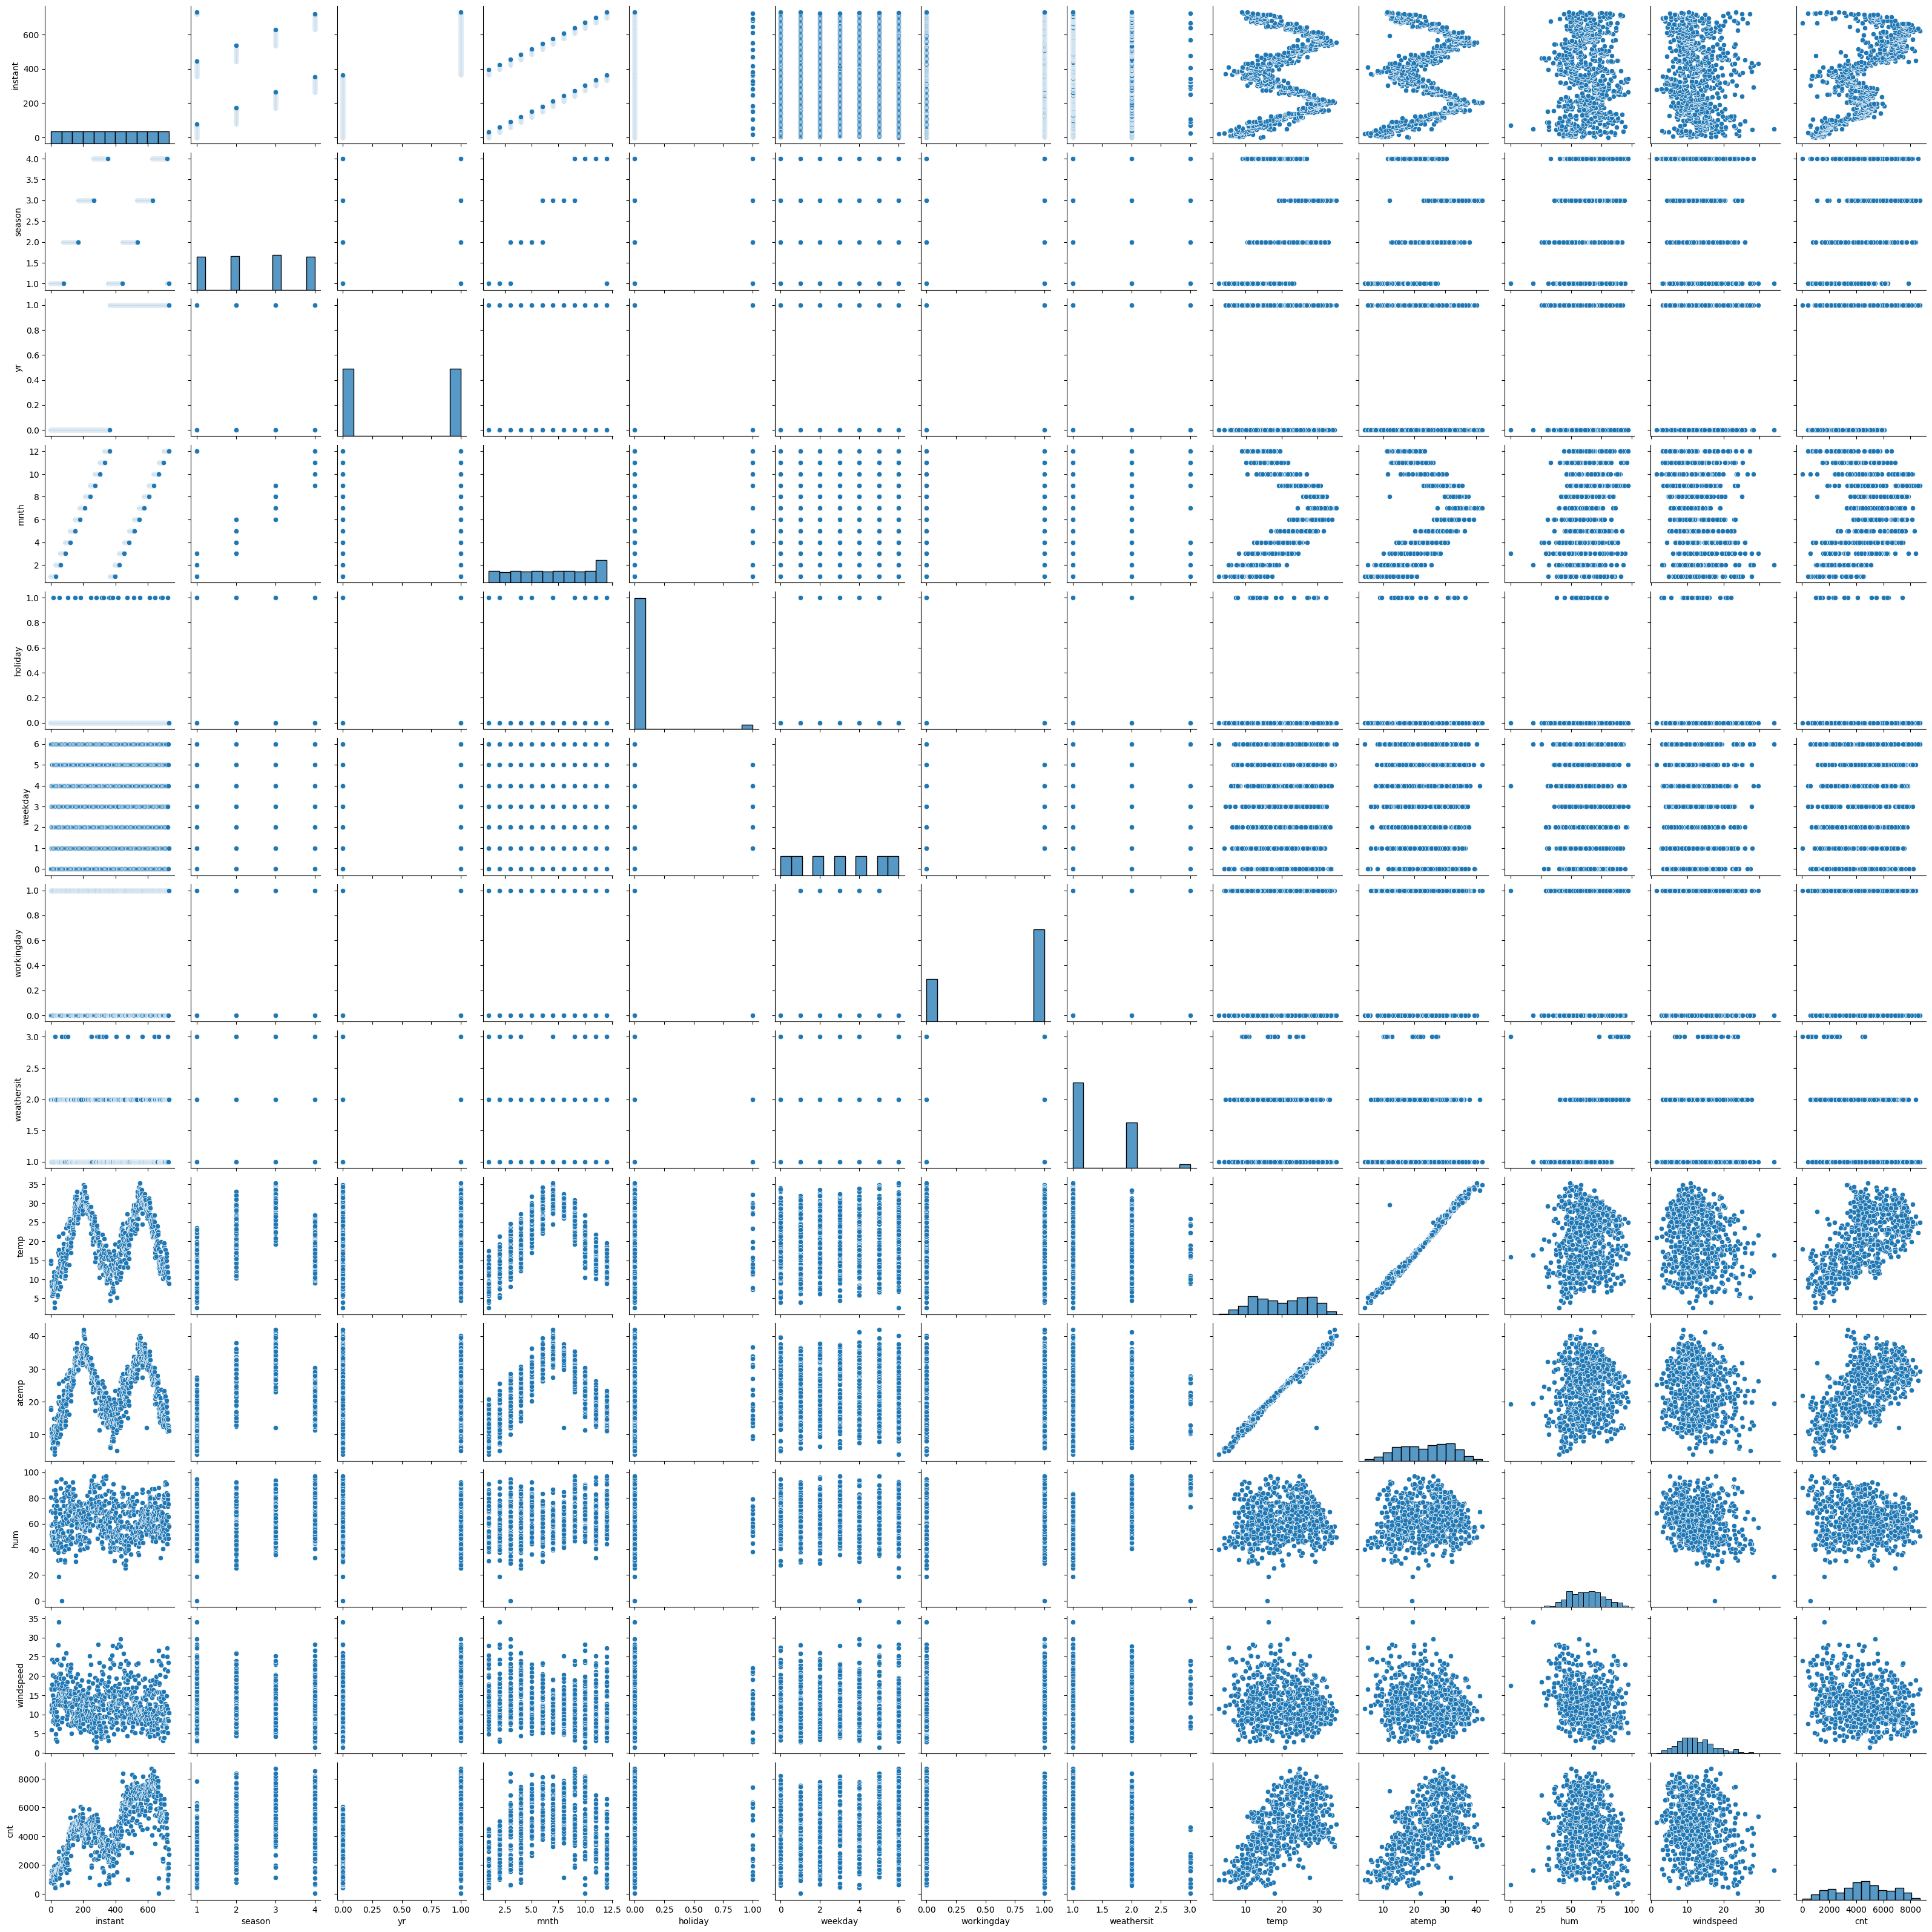

In [33]:
sns.pairplot(day)
plt.show()

**Lets plot some variables against cnt and see their correlation closely**

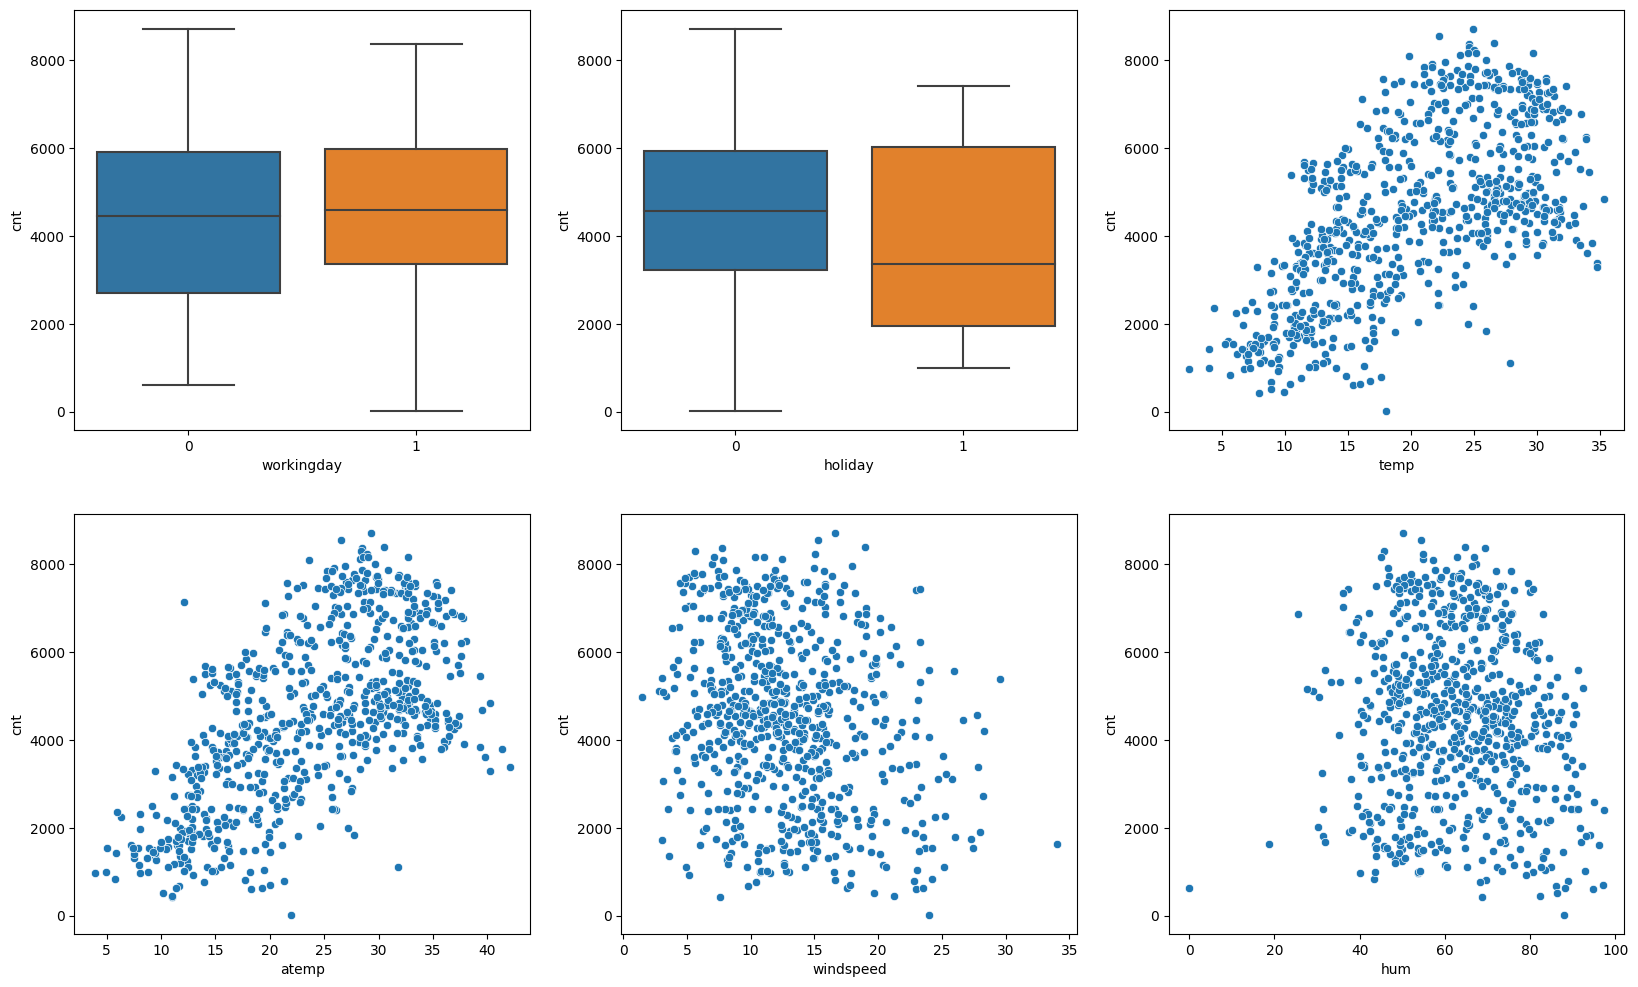

In [34]:
plt.figure(figsize=(20,12))

plt.subplot(2,3,1)
sns.boxplot(x='workingday',y='cnt',data=day)

plt.subplot(2,3,2)
sns.boxplot(x='holiday',y='cnt',data=day)

plt.subplot(2,3,3)
sns.scatterplot(x='temp',y='cnt',data=day)

plt.subplot(2,3,4)
sns.scatterplot(x='atemp',y='cnt',data=day)

plt.subplot(2,3,5)
sns.scatterplot(x='windspeed',y='cnt',data=day)

plt.subplot(2,3,6)
sns.scatterplot(x='hum',y='cnt',data=day)

plt.show()

## Step 2 : Preparing the data

Converting binary variables to 0 / 1
  - Other categorical variables to dummy vars

**Data in season was provided in integer values. But, in real this is information about season as given in the notes. So lets map integer values to Season names.**

In [35]:
day['season'].value_counts()

3    188
2    184
1    180
4    178
Name: season, dtype: int64

In [36]:
def season_map(x):
    return x.map({1: 'spring', 2 : 'summer', 3:'fall', 4:'winter'})
day[['season']] = day[['season']].apply(season_map)
day['season'].value_counts()

fall      188
summer    184
spring    180
winter    178
Name: season, dtype: int64

**weekday - Day of the week should be categorical column**

In [37]:
def weekday_map(x):
    return x.map({0:'Sunday',1: 'Monday', 2:'Tuesday', 3:'Wednesday', 4:'Thursday',5:'Friday'})
day[['weekday']] = day[['weekday']].apply(weekday_map)
day['weekday'].value_counts()

Sunday       105
Monday       105
Tuesday      104
Thursday     104
Friday       104
Wednesday    103
Name: weekday, dtype: int64

**weatherist - Day of the week should be categorical column**

In [38]:
def weathersit_map(x):
    return x.map({1:'Clear', 2:'Mist', 3:'Light Snow', 4:'Heavy Rain'})
day[['weathersit']] = day[['weathersit']].apply(weathersit_map)
day['weathersit'].value_counts()

Clear         463
Mist          246
Light Snow     21
Name: weathersit, dtype: int64

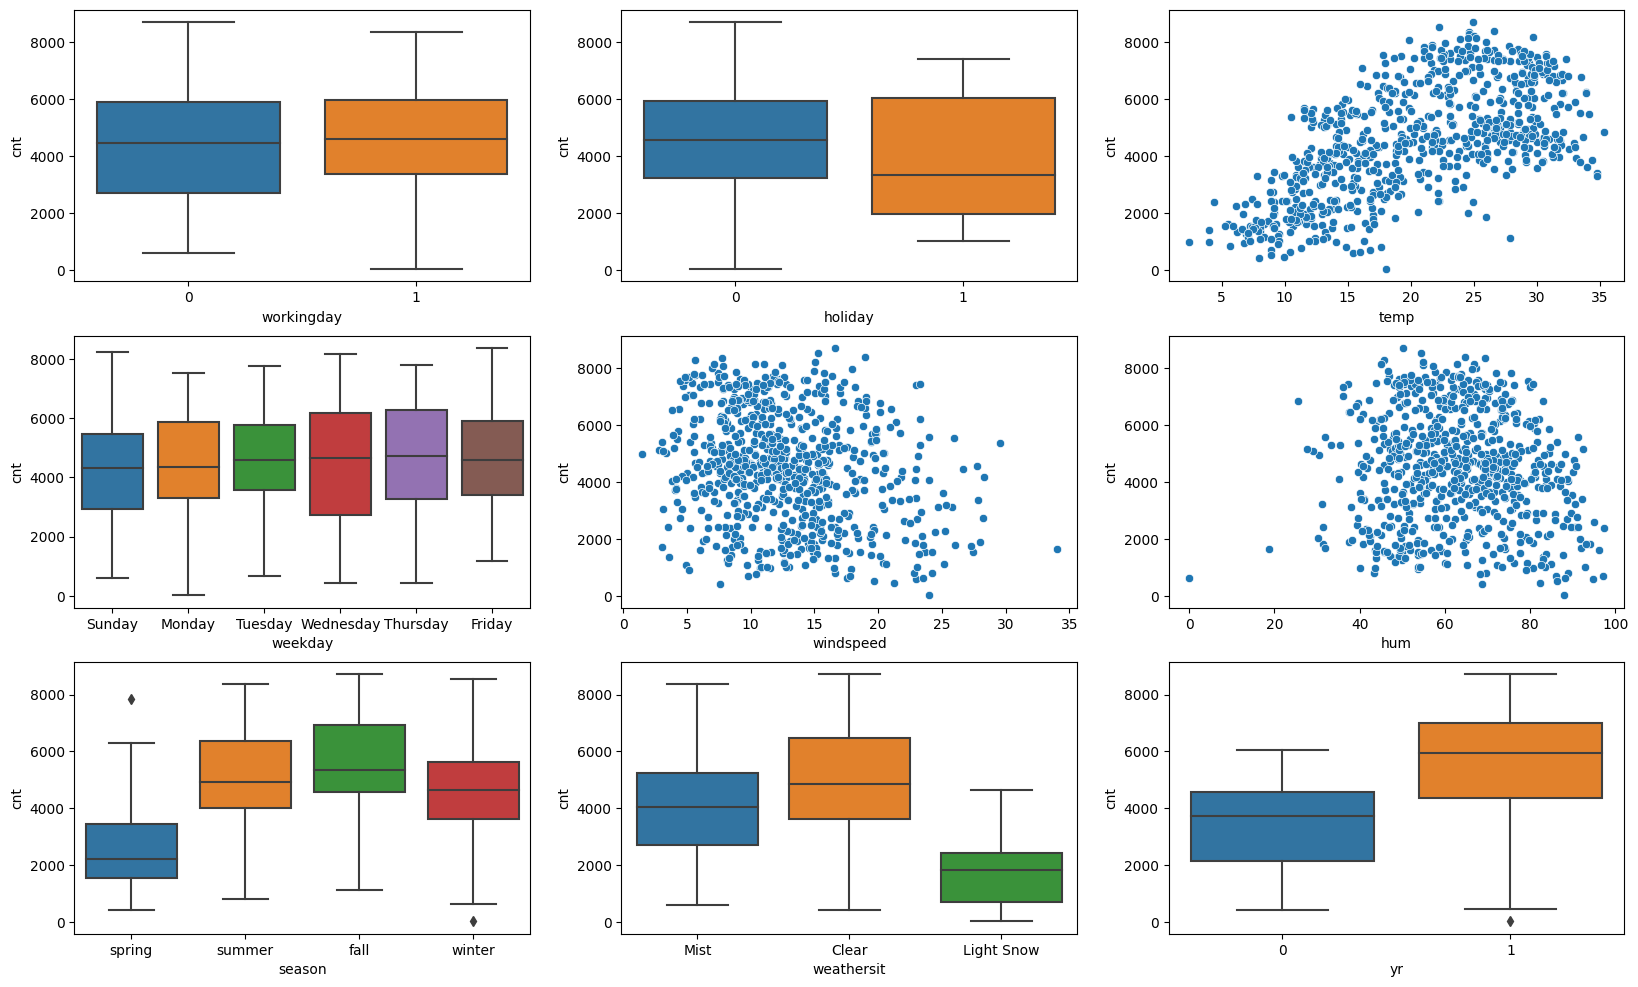

In [39]:
plt.figure(figsize=(20,12))

plt.subplot(3,3,1)
sns.boxplot(x='workingday',y='cnt',data=day)

plt.subplot(3,3,2)
sns.boxplot(x='holiday',y='cnt',data=day)

plt.subplot(3,3,3)
sns.scatterplot(x='temp',y='cnt',data=day)

plt.subplot(3,3,4)
sns.boxplot(x='weekday',y='cnt',data=day)

plt.subplot(3,3,5)
sns.scatterplot(x='windspeed',y='cnt',data=day)

plt.subplot(3,3,6)
sns.scatterplot(x='hum',y='cnt',data=day)

plt.subplot(3,3,7)
sns.boxplot(x='season',y='cnt',data=day)

plt.subplot(3,3,8)
sns.boxplot(x='weathersit',y='cnt',data=day)

plt.subplot(3,3,9)
sns.boxplot(x='yr',y='cnt',data=day)
plt.show()

From the graphs it is evident that cnt is more correlated to season, weathersit and yr are

Creating dummy variables

In [40]:
#creating dummy variable for season
season = pd.get_dummies(day['season'])
season

,fall,spring,summer,winter
0,0,1,0,0
1,0,1,0,0
2,0,1,0,0
3,0,1,0,0
4,0,1,0,0
...,...,...,...,...
725,0,1,0,0
726,0,1,0,0
727,0,1,0,0
728,0,1,0,0


In [41]:
season = pd.get_dummies(day['season'],drop_first=True)
season.head()

,spring,summer,winter
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0


In [42]:
day = pd.concat([day,season],axis=1)
day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,spring,summer,winter
0,1,01-01-2018,spring,0,1,0,NaN,0,Mist,14.110847,18.18125,80.5833,10.749882,985,1,0,0
1,2,02-01-2018,spring,0,1,0,Sunday,0,Mist,14.902598,17.68695,69.6087,16.652113,801,1,0,0
2,3,03-01-2018,spring,0,1,0,Monday,1,Clear,8.050924,9.47025,43.7273,16.636703,1349,1,0,0
3,4,04-01-2018,spring,0,1,0,Tuesday,1,Clear,8.200000,10.60610,59.0435,10.739832,1562,1,0,0
4,5,05-01-2018,spring,0,1,0,Wednesday,1,Clear,9.305237,11.46350,43.6957,12.522300,1600,1,0,0


In [43]:
day.drop('season',axis=1,inplace=True)
day.head()

,instant,dteday,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,spring,summer,winter
0,1,01-01-2018,0,1,0,NaN,0,Mist,14.110847,18.18125,80.5833,10.749882,985,1,0,0
1,2,02-01-2018,0,1,0,Sunday,0,Mist,14.902598,17.68695,69.6087,16.652113,801,1,0,0
2,3,03-01-2018,0,1,0,Monday,1,Clear,8.050924,9.47025,43.7273,16.636703,1349,1,0,0
3,4,04-01-2018,0,1,0,Tuesday,1,Clear,8.200000,10.60610,59.0435,10.739832,1562,1,0,0
4,5,05-01-2018,0,1,0,Wednesday,1,Clear,9.305237,11.46350,43.6957,12.522300,1600,1,0,0


In [44]:
day['weathersit'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 730 entries, 0 to 729
Series name: weathersit
Non-Null Count  Dtype 
--------------  ----- 
730 non-null    object
dtypes: object(1)
memory usage: 5.8+ KB


In [45]:
#creating dummy variable for weathersit
weekday = pd.get_dummies(day['weekday'])
weekday

,Friday,Monday,Sunday,Thursday,Tuesday,Wednesday
0,0,0,0,0,0,0
1,0,0,1,0,0,0
2,0,1,0,0,0,0
3,0,0,0,0,1,0
4,0,0,0,0,0,1
...,...,...,...,...,...,...
725,0,0,0,1,0,0
726,1,0,0,0,0,0
727,0,0,0,0,0,0
728,0,0,1,0,0,0


In [46]:
weekday = pd.get_dummies(day['weekday'],drop_first=True)
weekday.head()

,Monday,Sunday,Thursday,Tuesday,Wednesday
0,0,0,0,0,0
1,0,1,0,0,0
2,1,0,0,0,0
3,0,0,0,1,0
4,0,0,0,0,1


In [47]:
day = pd.concat([day,weekday],axis=1)
day.head()

,instant,dteday,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,...,windspeed,cnt,spring,summer,winter,Monday,Sunday,Thursday,Tuesday,Wednesday
0,1,01-01-2018,0,1,0,NaN,0,Mist,14.110847,18.18125,...,10.749882,985,1,0,0,0,0,0,0,0
1,2,02-01-2018,0,1,0,Sunday,0,Mist,14.902598,17.68695,...,16.652113,801,1,0,0,0,1,0,0,0
2,3,03-01-2018,0,1,0,Monday,1,Clear,8.050924,9.47025,...,16.636703,1349,1,0,0,1,0,0,0,0
3,4,04-01-2018,0,1,0,Tuesday,1,Clear,8.200000,10.60610,...,10.739832,1562,1,0,0,0,0,0,1,0
4,5,05-01-2018,0,1,0,Wednesday,1,Clear,9.305237,11.46350,...,12.522300,1600,1,0,0,0,0,0,0,1


In [48]:
day.drop('weekday',axis=1,inplace=True)
day.head()

,instant,dteday,yr,mnth,holiday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,spring,summer,winter,Monday,Sunday,Thursday,Tuesday,Wednesday
0,1,01-01-2018,0,1,0,0,Mist,14.110847,18.18125,80.5833,10.749882,985,1,0,0,0,0,0,0,0
1,2,02-01-2018,0,1,0,0,Mist,14.902598,17.68695,69.6087,16.652113,801,1,0,0,0,1,0,0,0
2,3,03-01-2018,0,1,0,1,Clear,8.050924,9.47025,43.7273,16.636703,1349,1,0,0,1,0,0,0,0
3,4,04-01-2018,0,1,0,1,Clear,8.200000,10.60610,59.0435,10.739832,1562,1,0,0,0,0,0,1,0
4,5,05-01-2018,0,1,0,1,Clear,9.305237,11.46350,43.6957,12.522300,1600,1,0,0,0,0,0,0,1


In [49]:
#creating dummy variable for weathersit
weathersit = pd.get_dummies(day['weathersit'])
weathersit

,Clear,Light Snow,Mist
0,0,0,1
1,0,0,1
2,1,0,0
3,1,0,0
4,1,0,0
...,...,...,...
725,0,0,1
726,0,0,1
727,0,0,1
728,1,0,0


In [50]:
weathersit = pd.get_dummies(day['weathersit'],drop_first=True)
weathersit.head()

,Light Snow,Mist
0,0,1
1,0,1
2,0,0
3,0,0
4,0,0


In [51]:
day = pd.concat([day,weathersit],axis=1)
day.head()

,instant,dteday,yr,mnth,holiday,workingday,weathersit,temp,atemp,hum,...,spring,summer,winter,Monday,Sunday,Thursday,Tuesday,Wednesday,Light Snow,Mist
0,1,01-01-2018,0,1,0,0,Mist,14.110847,18.18125,80.5833,...,1,0,0,0,0,0,0,0,0,1
1,2,02-01-2018,0,1,0,0,Mist,14.902598,17.68695,69.6087,...,1,0,0,0,1,0,0,0,0,1
2,3,03-01-2018,0,1,0,1,Clear,8.050924,9.47025,43.7273,...,1,0,0,1,0,0,0,0,0,0
3,4,04-01-2018,0,1,0,1,Clear,8.200000,10.60610,59.0435,...,1,0,0,0,0,0,1,0,0,0
4,5,05-01-2018,0,1,0,1,Clear,9.305237,11.46350,43.6957,...,1,0,0,0,0,0,0,1,0,0


In [52]:
day.drop('weathersit',axis=1,inplace=True)
day.head()

,instant,dteday,yr,mnth,holiday,workingday,temp,atemp,hum,windspeed,...,spring,summer,winter,Monday,Sunday,Thursday,Tuesday,Wednesday,Light Snow,Mist
0,1,01-01-2018,0,1,0,0,14.110847,18.18125,80.5833,10.749882,...,1,0,0,0,0,0,0,0,0,1
1,2,02-01-2018,0,1,0,0,14.902598,17.68695,69.6087,16.652113,...,1,0,0,0,1,0,0,0,0,1
2,3,03-01-2018,0,1,0,1,8.050924,9.47025,43.7273,16.636703,...,1,0,0,1,0,0,0,0,0,0
3,4,04-01-2018,0,1,0,1,8.200000,10.60610,59.0435,10.739832,...,1,0,0,0,0,0,1,0,0,0
4,5,05-01-2018,0,1,0,1,9.305237,11.46350,43.6957,12.522300,...,1,0,0,0,0,0,0,1,0,0


In [53]:
day.drop('dteday',axis=1,inplace=True)
day.head()

,instant,yr,mnth,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,winter,Monday,Sunday,Thursday,Tuesday,Wednesday,Light Snow,Mist
0,1,0,1,0,0,14.110847,18.18125,80.5833,10.749882,985,1,0,0,0,0,0,0,0,0,1
1,2,0,1,0,0,14.902598,17.68695,69.6087,16.652113,801,1,0,0,0,1,0,0,0,0,1
2,3,0,1,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,0,1,0,0,0,0,0,0
3,4,0,1,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,0,0,0,0,1,0,0,0
4,5,0,1,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,0,0,0,0,0,1,0,0


In [54]:
day.drop('instant',axis=1,inplace=True)
day.head()

,yr,mnth,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,winter,Monday,Sunday,Thursday,Tuesday,Wednesday,Light Snow,Mist
0,0,1,0,0,14.110847,18.18125,80.5833,10.749882,985,1,0,0,0,0,0,0,0,0,1
1,0,1,0,0,14.902598,17.68695,69.6087,16.652113,801,1,0,0,0,1,0,0,0,0,1
2,0,1,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,0,1,0,0,0,0,0,0
3,0,1,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,0,0,0,0,1,0,0,0
4,0,1,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,0,0,0,0,0,1,0,0


## Splitting Train and Test

In [55]:
df_train, df_test = train_test_split(day,train_size=0.7,random_state=100)
print(df_train.shape)
print(df_test.shape)

(510, 19)
(220, 19)


## Rescaling the feature
Min - Max scaling (normalisation) : between 0 and 1

Standardisation (mean - 0 , sigma - 1)

In [56]:
scaler = MinMaxScaler()

#create a list of numeric vars
num_vars = ['temp','atemp','hum','windspeed','cnt','mnth']

#fit on data
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
df_train[num_vars].head()

,temp,atemp,hum,windspeed,cnt,mnth
576,0.815169,0.766351,0.725633,0.264686,0.827658,0.545455
426,0.442393,0.438975,0.640189,0.255342,0.465255,0.181818
728,0.245101,0.200348,0.498067,0.663106,0.204096,1.000000
482,0.395666,0.391735,0.504508,0.188475,0.482973,0.272727
111,0.345824,0.318819,0.751824,0.380981,0.191095,0.272727


In [57]:
df_train[num_vars].describe()

,temp,atemp,hum,windspeed,cnt,mnth
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.537440,0.513156,0.650480,0.320883,0.513499,0.503743
std,0.225858,0.212410,0.145846,0.169803,0.224421,0.315038
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.339853,0.332086,0.538643,0.199179,0.356420,0.181818
50%,0.542596,0.529718,0.653714,0.296763,0.518638,0.545455
75%,0.735215,0.688457,0.754830,0.414447,0.684710,0.818182
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Step 3 - Train the Model

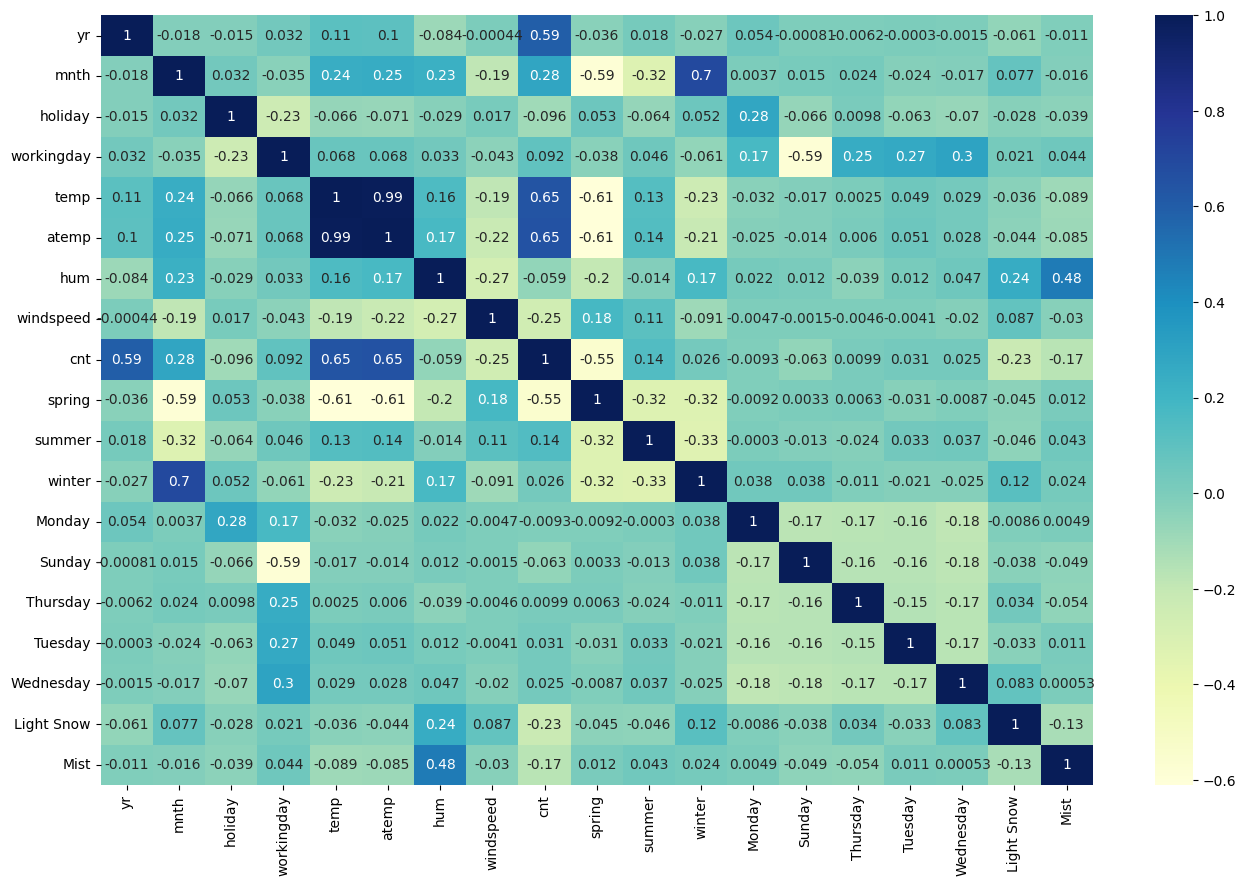

In [58]:
plt.figure(figsize=(16,10))
sns.heatmap(df_train.corr(),annot=True,cmap='YlGnBu')
plt.show()

In [59]:
df_train.head()

,yr,mnth,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,winter,Monday,Sunday,Thursday,Tuesday,Wednesday,Light Snow,Mist
576,1,0.545455,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,0,0,0,0,0,1,0,0,0
426,1,0.181818,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,1,0,0,0,0,0,0,0,0,1
728,1,1.000000,0,0,0.245101,0.200348,0.498067,0.663106,0.204096,1,0,0,0,1,0,0,0,0,0
482,1,0.272727,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,0,1,0,0,0,0,0,0,0,1
111,0,0.272727,0,1,0.345824,0.318819,0.751824,0.380981,0.191095,0,1,0,0,0,0,0,0,0,1


In [60]:
y_train = df_train.pop('cnt')
X_train = df_train
X_train.head()

,yr,mnth,holiday,workingday,temp,atemp,hum,windspeed,spring,summer,winter,Monday,Sunday,Thursday,Tuesday,Wednesday,Light Snow,Mist
576,1,0.545455,0,1,0.815169,0.766351,0.725633,0.264686,0,0,0,0,0,0,1,0,0,0
426,1,0.181818,0,0,0.442393,0.438975,0.640189,0.255342,1,0,0,0,0,0,0,0,0,1
728,1,1.000000,0,0,0.245101,0.200348,0.498067,0.663106,1,0,0,0,1,0,0,0,0,0
482,1,0.272727,0,0,0.395666,0.391735,0.504508,0.188475,0,1,0,0,0,0,0,0,0,1
111,0,0.272727,0,1,0.345824,0.318819,0.751824,0.380981,0,1,0,0,0,0,0,0,0,1


## Statistical significance of the variable

In [61]:
X_train_sm = sm.add_constant(X_train['temp'])
lr = sm.OLS(y_train,X_train_sm)
lr_model = lr.fit()
lr_model.params

const    0.169031
temp     0.640944
dtype: float64

In [62]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.416
Model:                            OLS   Adj. R-squared:                  0.415
Method:                 Least Squares   F-statistic:                     362.0
Date:                Wed, 20 Sep 2023   Prob (F-statistic):           2.46e-61
Time:                        15:39:18   Log-Likelihood:                 176.09
No. Observations:                 510   AIC:                            -348.2
Df Residuals:                     508   BIC:                            -339.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1690      0.020      8.608      0.000       0.130       0.208
temp           0.6409      0.034     19.026      0.000       0.575       0.707
==============================================================================
Omnibus:                        6.355   Durbin-Watson:                   2.069
Prob(Omnibus):                  0.042   Jarque-Bera (JB):                4.521
Skew:                           0.088   Prob(JB):                        0.104
Kurtosis:                       2.574   Cond. No.                         5.76
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [63]:
X_train_sm = sm.add_constant(X_train['atemp'])
lr = sm.OLS(y_train,X_train_sm)
lr_model = lr.fit()
lr_model.params

const    0.162201
atemp    0.684584
dtype: float64

In [64]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.420
Model:                            OLS   Adj. R-squared:                  0.419
Method:                 Least Squares   F-statistic:                     367.6
Date:                Wed, 20 Sep 2023   Prob (F-statistic):           4.77e-62
Time:                        15:39:18   Log-Likelihood:                 177.73
No. Observations:                 510   AIC:                            -351.5
Df Residuals:                     508   BIC:                            -343.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1622      0.020      8.181      0.000       0.123       0.201
atemp          0.6846      0.036     19.173      0.000       0.614       0.755
==============================================================================
Omnibus:                        3.256   Durbin-Watson:                   2.102
Prob(Omnibus):                  0.196   Jarque-Bera (JB):                2.759
Skew:                           0.081   Prob(JB):                        0.252
Kurtosis:                       2.678   Cond. No.                         6.00
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [65]:
#add another variable bathrooms
X_train_sm = X_train[['atemp','hum']]
X_train_sm = sm.add_constant(X_train_sm)

lr = sm.OLS(y_train,X_train_sm)

lr_model = lr.fit()
lr_model.params

const    0.319925
atemp    0.715625
hum     -0.266960
dtype: float64

In [66]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.449
Model:                            OLS   Adj. R-squared:                  0.447
Method:                 Least Squares   F-statistic:                     206.6
Date:                Wed, 20 Sep 2023   Prob (F-statistic):           2.34e-66
Time:                        15:39:18   Log-Likelihood:                 190.92
No. Observations:                 510   AIC:                            -375.8
Df Residuals:                     507   BIC:                            -363.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3199      0.036      8.878      0.000       0.249       0.391
atemp          0.7156      0.035     20.250      0.000       0.646       0.785
hum           -0.2670      0.051     -5.187      0.000      -0.368      -0.166
==============================================================================
Omnibus:                        1.021   Durbin-Watson:                   2.083
Prob(Omnibus):                  0.600   Jarque-Bera (JB):                1.091
Skew:                           0.058   Prob(JB):                        0.579
Kurtosis:                       2.806   Cond. No.                         10.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [67]:
#add another variable bathrooms
X_train_sm = X_train[['atemp','hum','windspeed']]
X_train_sm = sm.add_constant(X_train_sm)

lr = sm.OLS(y_train,X_train_sm)

lr_model = lr.fit()
lr_model.params

const        0.449283
atemp        0.684035
hum         -0.329442
windspeed   -0.225953
dtype: float64

In [68]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.475
Model:                            OLS   Adj. R-squared:                  0.472
Method:                 Least Squares   F-statistic:                     152.8
Date:                Wed, 20 Sep 2023   Prob (F-statistic):           1.67e-70
Time:                        15:39:18   Log-Likelihood:                 203.38
No. Observations:                 510   AIC:                            -398.8
Df Residuals:                     506   BIC:                            -381.8
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4493      0.044     10.309      0.000       0.364       0.535
atemp          0.6840      0.035     19.496      0.000       0.615       0.753
hum           -0.3294      0.052     -6.362      0.000      -0.431      -0.228
windspeed     -0.2260      0.045     -5.034      0.000      -0.314      -0.138
==============================================================================
Omnibus:                        1.276   Durbin-Watson:                   2.090
Prob(Omnibus):                  0.528   Jarque-Bera (JB):                1.360
Skew:                           0.091   Prob(JB):                        0.507
Kurtosis:                       2.824   Cond. No.                         12.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Add all the variables

In [69]:
X_train.columns

Index(['yr', 'mnth', 'holiday', 'workingday', 'temp', 'atemp', 'hum',
       'windspeed', 'spring', 'summer', 'winter', 'Monday', 'Sunday',
       'Thursday', 'Tuesday', 'Wednesday', 'Light Snow', 'Mist'],
      dtype='object')

In [70]:
y_train

576    0.827658
426    0.465255
728    0.204096
482    0.482973
111    0.191095
         ...   
578    0.832835
53     0.218017
350    0.312586
79     0.236424
520    0.802922
Name: cnt, Length: 510, dtype: float64

In [71]:
X_train_sm = sm.add_constant(X_train)

lr = sm.OLS(y_train,X_train_sm)

lr_model = lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     136.9
Date:                Wed, 20 Sep 2023   Prob (F-statistic):          3.97e-178
Time:                        15:39:19   Log-Likelihood:                 496.55
No. Observations:                 510   AIC:                            -955.1
Df Residuals:                     491   BIC:                            -874.6
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2929      0.038      7.622      0.000       0.217       0.368
yr             0.2320      0.008     27.573      0.000       0.215       0.249
mnth           0.0155      0.026      0.599      0.550      -0.035       0.066
holiday       -0.0835      0.031     -2.664      0.008      -0.145      -0.022
workingday     0.0010      0.016      0.062      0.950      -0.030       0.032
temp           0.4372      0.140      3.123      0.002       0.162       0.712
atemp          0.0581      0.143      0.406      0.685      -0.223       0.339
hum           -0.1289      0.039     -3.301      0.001      -0.206      -0.052
windspeed     -0.1786      0.027     -6.586      0.000      -0.232      -0.125
spring        -0.0695      0.023     -3.001      0.003      -0.115      -0.024
summer         0.0469      0.016      2.989      0.003       0.016       0.078
winter         0.0831      0.019      4.435      0.000       0.046       0.120
Monday        -0.0221      0.016     -1.364      0.173      -0.054       0.010
Sunday        -0.0561      0.015     -3.689      0.000      -0.086      -0.026
Thursday      -0.0086      0.016     -0.528      0.598      -0.041       0.023
Tuesday       -0.0187      0.016     -1.142      0.254      -0.051       0.013
Wednesday     -0.0031      0.016     -0.200      0.842      -0.034       0.028
Light Snow    -0.2483      0.027     -9.034      0.000      -0.302      -0.194
Mist          -0.0566      0.011     -5.184      0.000      -0.078      -0.035
==============================================================================
Omnibus:                       72.934   Durbin-Watson:                   2.059
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              183.242
Skew:                          -0.729   Prob(JB):                     1.62e-40
Kurtosis:                       5.549   Cond. No.                         90.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [72]:
#Check VIF
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values,i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
4,temp,382.20
5,atemp,370.32
6,hum,31.18
1,mnth,12.35
3,workingday,9.46
7,windspeed,5.03
10,winter,4.66
8,spring,4.38
9,summer,2.70
17,Mist,2.36


We could remove a varible with high P value, high VIF  &&  low p value, high VIF : remove later both low high P, low VIF : remove first

In [73]:
X = X_train.drop('Light Snow',axis=1)
X_train_sm = sm.add_constant(X)

lr = sm.OLS(y_train,X_train_sm)

lr_model = lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.806
Model:                            OLS   Adj. R-squared:                  0.800
Method:                 Least Squares   F-statistic:                     120.4
Date:                Wed, 20 Sep 2023   Prob (F-statistic):          6.74e-163
Time:                        15:39:19   Log-Likelihood:                 457.34
No. Observations:                 510   AIC:                            -878.7
Df Residuals:                     492   BIC:                            -802.5
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3421      0.041      8.337      0.000       0.261       0.423
yr             0.2329      0.009     25.655      0.000       0.215       0.251
mnth           0.0291      0.028      1.045      0.296      -0.026       0.084
holiday       -0.0672      0.034     -1.991      0.047      -0.133      -0.001
workingday     0.0071      0.017      0.419      0.676      -0.026       0.040
temp           0.3906      0.151      2.589      0.010       0.094       0.687
atemp          0.1468      0.154      0.954      0.341      -0.156       0.449
hum           -0.2695      0.039     -6.970      0.000      -0.345      -0.194
windspeed     -0.2244      0.029     -7.808      0.000      -0.281      -0.168
spring        -0.0502      0.025     -2.019      0.044      -0.099      -0.001
summer         0.0582      0.017      3.452      0.001       0.025       0.091
winter         0.0838      0.020      4.146      0.000       0.044       0.123
Monday        -0.0245      0.017     -1.402      0.162      -0.059       0.010
Sunday        -0.0467      0.016     -2.854      0.005      -0.079      -0.015
Thursday      -0.0160      0.018     -0.909      0.364      -0.051       0.019
Tuesday       -0.0187      0.018     -1.062      0.289      -0.053       0.016
Wednesday     -0.0130      0.017     -0.772      0.441      -0.046       0.020
Mist          -0.0244      0.011     -2.192      0.029      -0.046      -0.003
==============================================================================
Omnibus:                       99.397   Durbin-Watson:                   2.059
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              263.117
Skew:                          -0.961   Prob(JB):                     7.33e-58
Kurtosis:                       5.948   Cond. No.                         90.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [74]:
X = X.drop('Mist',axis=1)
X_train_sm = sm.add_constant(X)

lr = sm.OLS(y_train,X_train_sm)

lr_model = lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.804
Model:                            OLS   Adj. R-squared:                  0.798
Method:                 Least Squares   F-statistic:                     126.6
Date:                Wed, 20 Sep 2023   Prob (F-statistic):          6.32e-163
Time:                        15:39:19   Log-Likelihood:                 454.86
No. Observations:                 510   AIC:                            -875.7
Df Residuals:                     493   BIC:                            -803.7
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3534      0.041      8.646      0.000       0.273       0.434
yr             0.2315      0.009     25.468      0.000       0.214       0.249
mnth           0.0313      0.028      1.117      0.264      -0.024       0.086
holiday       -0.0675      0.034     -1.992      0.047      -0.134      -0.001
workingday     0.0049      0.017      0.290      0.772      -0.028       0.038
temp           0.4062      0.151      2.685      0.007       0.109       0.704
atemp          0.1452      0.154      0.940      0.348      -0.158       0.449
hum           -0.3138      0.033     -9.487      0.000      -0.379      -0.249
windspeed     -0.2296      0.029     -7.983      0.000      -0.286      -0.173
spring        -0.0462      0.025     -1.857      0.064      -0.095       0.003
summer         0.0593      0.017      3.502      0.001       0.026       0.093
winter         0.0877      0.020      4.339      0.000       0.048       0.127
Monday        -0.0215      0.017     -1.230      0.219      -0.056       0.013
Sunday        -0.0445      0.016     -2.714      0.007      -0.077      -0.012
Thursday      -0.0123      0.018     -0.700      0.485      -0.047       0.022
Tuesday       -0.0162      0.018     -0.918      0.359      -0.051       0.018
Wednesday     -0.0097      0.017     -0.573      0.567      -0.043       0.023
==============================================================================
Omnibus:                       91.463   Durbin-Watson:                   2.043
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              220.494
Skew:                          -0.919   Prob(JB):                     1.32e-48
Kurtosis:                       5.645   Cond. No.                         89.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [75]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
4,temp,380.38
5,atemp,368.68
6,hum,19.28
1,mnth,12.11
3,workingday,9.40
7,windspeed,4.91
10,winter,4.56
8,spring,3.92
9,summer,2.59
11,Monday,2.31


In [76]:
X = X.drop(['winter','summer','spring'],axis=1)
X_train_sm = sm.add_constant(X)

lr = sm.OLS(y_train,X_train_sm)

lr_model = lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.771
Model:                            OLS   Adj. R-squared:                  0.765
Method:                 Least Squares   F-statistic:                     128.2
Date:                Wed, 20 Sep 2023   Prob (F-statistic):          3.42e-149
Time:                        15:39:19   Log-Likelihood:                 414.37
No. Observations:                 510   AIC:                            -800.7
Df Residuals:                     496   BIC:                            -741.5
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3041      0.032      9.567      0.000       0.242       0.366
yr             0.2337      0.010     23.890      0.000       0.214       0.253
mnth           0.1249      0.016      7.675      0.000       0.093       0.157
holiday       -0.0792      0.037     -2.169      0.031      -0.151      -0.007
workingday     0.0043      0.018      0.235      0.814      -0.032       0.040
temp           0.1934      0.152      1.273      0.203      -0.105       0.492
atemp          0.3699      0.163      2.274      0.023       0.050       0.690
hum           -0.2883      0.035     -8.145      0.000      -0.358      -0.219
windspeed     -0.2077      0.031     -6.789      0.000      -0.268      -0.148
Monday        -0.0155      0.019     -0.821      0.412      -0.052       0.022
Sunday        -0.0420      0.018     -2.374      0.018      -0.077      -0.007
Thursday      -0.0145      0.019     -0.765      0.445      -0.052       0.023
Tuesday       -0.0109      0.019     -0.572      0.567      -0.048       0.027
Wednesday     -0.0060      0.018     -0.330      0.741      -0.042       0.030
==============================================================================
Omnibus:                       57.571   Durbin-Watson:                   2.085
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              101.083
Skew:                          -0.701   Prob(JB):                     1.12e-22
Kurtosis:                       4.671   Cond. No.                         83.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [77]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
5,atemp,347.65
4,temp,336.19
6,hum,11.80
3,workingday,9.08
1,mnth,3.98
7,windspeed,3.63
8,Monday,2.30
12,Wednesday,2.26
10,Thursday,2.07
11,Tuesday,2.05


In [78]:
X = X.drop('temp',axis=1)
X_train_sm = sm.add_constant(X)

lr = sm.OLS(y_train,X_train_sm)

lr_model = lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.770
Model:                            OLS   Adj. R-squared:                  0.764
Method:                 Least Squares   F-statistic:                     138.6
Date:                Wed, 20 Sep 2023   Prob (F-statistic):          6.35e-150
Time:                        15:39:19   Log-Likelihood:                 413.54
No. Observations:                 510   AIC:                            -801.1
Df Residuals:                     497   BIC:                            -746.0
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3018      0.032      9.504      0.000       0.239       0.364
yr             0.2340      0.010     23.915      0.000       0.215       0.253
mnth           0.1249      0.016      7.665      0.000       0.093       0.157
holiday       -0.0759      0.036     -2.083      0.038      -0.147      -0.004
workingday     0.0060      0.018      0.328      0.743      -0.030       0.042
atemp          0.5748      0.024     23.721      0.000       0.527       0.622
hum           -0.2900      0.035     -8.196      0.000      -0.360      -0.221
windspeed     -0.2012      0.030     -6.666      0.000      -0.260      -0.142
Monday        -0.0181      0.019     -0.963      0.336      -0.055       0.019
Sunday        -0.0423      0.018     -2.389      0.017      -0.077      -0.008
Thursday      -0.0166      0.019     -0.878      0.380      -0.054       0.021
Tuesday       -0.0128      0.019     -0.676      0.500      -0.050       0.024
Wednesday     -0.0074      0.018     -0.409      0.683      -0.043       0.028
==============================================================================
Omnibus:                       58.531   Durbin-Watson:                   2.091
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              109.468
Skew:                          -0.688   Prob(JB):                     1.70e-24
Kurtosis:                       4.805   Cond. No.                         16.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [79]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
5,hum,11.65
3,workingday,9.04
4,atemp,7.13
1,mnth,3.98
6,windspeed,3.54
7,Monday,2.28
11,Wednesday,2.25
9,Thursday,2.05
10,Tuesday,2.03
0,yr,2.02


## Step 4 : Residual Analysis

In [80]:
y_train_pred = lr_model.predict(X_train_sm)

<ipython-input-81-8c427749383a>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(res)


<Axes: ylabel='Density'>

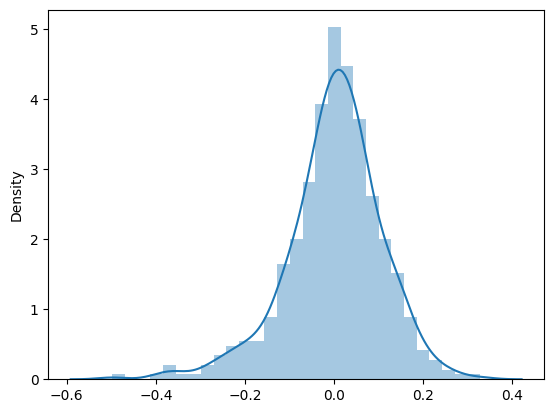

In [81]:
res = y_train - y_train_pred
sns.distplot(res)

In [82]:
num_vars = ['temp','atemp','hum','windspeed','cnt','mnth']

#fit on data
df_test[num_vars] = scaler.transform(df_test[num_vars])
df_test.head()

,yr,mnth,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,winter,Monday,Sunday,Thursday,Tuesday,Wednesday,Light Snow,Mist
184,0,0.545455,1,0,0.831783,0.769660,0.657364,0.084219,0.692706,0,0,0,1,0,0,0,0,0,1
535,1,0.454545,0,1,0.901354,0.842587,0.610133,0.153728,0.712034,0,1,0,0,0,0,0,1,0,0
299,0,0.818182,0,1,0.511964,0.496145,0.837699,0.334206,0.303382,0,0,1,0,0,1,0,0,0,1
221,0,0.636364,0,1,0.881625,0.795343,0.437098,0.339570,0.547400,0,0,0,0,0,0,0,1,0,0
152,0,0.454545,0,1,0.817246,0.741471,0.314298,0.537414,0.569029,0,1,0,0,0,1,0,0,0,0


In [83]:
df_test.describe()

,yr,mnth,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,winter,Monday,Sunday,Thursday,Tuesday,Wednesday,Light Snow,Mist
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.481818,0.499174,0.036364,0.700000,0.558718,0.532847,0.638221,0.313293,0.522154,0.254545,0.263636,0.236364,0.127273,0.145455,0.163636,0.168182,0.100000,0.027273,0.318182
std,0.500809,0.311120,0.187620,0.459303,0.233187,0.217401,0.148694,0.159584,0.219163,0.436599,0.441609,0.425817,0.334038,0.353363,0.370789,0.374881,0.300684,0.163248,0.466833
min,0.000000,0.000000,0.000000,0.000000,0.046591,0.025950,0.261915,-0.042808,0.048205,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.272727,0.000000,0.000000,0.355429,0.344870,0.529197,0.198843,0.378595,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.454545,0.000000,1.000000,0.558172,0.544652,0.625590,0.300126,0.524678,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.727273,0.000000,1.000000,0.755981,0.713308,0.743798,0.402718,0.677750,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,0.984424,0.980934,1.002146,0.807474,0.963300,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [84]:
y_test = df_test.pop('cnt')
X_test = df_test

In [85]:
X_test_sm = sm.add_constant(X_test)
X_test_sm.head()

,const,yr,mnth,holiday,workingday,temp,atemp,hum,windspeed,spring,summer,winter,Monday,Sunday,Thursday,Tuesday,Wednesday,Light Snow,Mist
184,1.0,0,0.545455,1,0,0.831783,0.769660,0.657364,0.084219,0,0,0,1,0,0,0,0,0,1
535,1.0,1,0.454545,0,1,0.901354,0.842587,0.610133,0.153728,0,1,0,0,0,0,0,1,0,0
299,1.0,0,0.818182,0,1,0.511964,0.496145,0.837699,0.334206,0,0,1,0,0,1,0,0,0,1
221,1.0,0,0.636364,0,1,0.881625,0.795343,0.437098,0.339570,0,0,0,0,0,0,0,1,0,0
152,1.0,0,0.454545,0,1,0.817246,0.741471,0.314298,0.537414,0,1,0,0,0,1,0,0,0,0


In [86]:
X_test_sm = X_test_sm.drop(["Mist","Light Snow","summer","spring","winter","temp"], axis=1)

In [87]:
y_test_pred = lr_model.predict(X_test_sm)

In [88]:
r2_score(y_true=y_test,y_pred=y_test_pred)

0.7341149176676741